Explicitly calling photutils_detection with use_seg=True give the same results as just running the sim with a seg_file, but providing no catalog.

In [1]:
# Imports
import grizli
import grizli.model

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import os

os.chdir("/Users/keith/astr/research_astr/summer-roman-project/new-sims/fits")

In [2]:
roman_sim = grizli.model.GrismFLT(direct_file="rotated_GRS_FOV0_roll0_dx0_dy0_SCA1_direct_final.fits",
                                  seg_file="seg.fits", pad=100)



Image cutout: x=slice(0, 4088, None), y=slice(0, 4088, None) [Out of range]
rotated_GRS_FOV0_roll0_dx0_dy0_SCA1_direct_final.fits / Pad ref HDU with 264 pixels
rotated_GRS_FOV0_roll0_dx0_dy0_SCA1_direct_final.fits / blot segmentation seg.fits[0]
The following task in the stsci.skypac package can be run with TEAL:
                                    skymatch                                    
The following tasks in the drizzlepac package can be run with TEAL:
    astrodrizzle       config_testbed      imagefindpars           mapreg       
       photeq            pixreplace           pixtopix            pixtosky      
  refimagefindpars       resetbits          runastrodriz          skytopix      
     tweakback            tweakreg           updatenpol
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...


In [3]:
## Make a simple detection catalog + segmentation image with photutils.
roman_sim.photutils_detection(detect_thresh=2, grow_seg=0, gauss_fwhm=2., 
                             verbose=True, save_detection=True, use_seg=True)

rotated_GRS_FOV0_roll0_dx0_dy0_SCA1_direct_final: photutils.source_properties


        Use `~photutils.segmentation.SourceCatalog` instead. [grizli.utils]
        Use `~photutils.segmentation.SourceCatalog` instead. [photutils.segmentation.properties]
        Use `~photutils.segmentation.SourceCatalog` instead. [photutils.segmentation.properties]


Rename column: xcentroid -> x_flt
Rename column: ycentroid -> y_flt
rotated_GRS_FOV0_roll0_dx0_dy0_SCA1_direct_final: photutils.source_properties - 7679 objects
rotated_GRS_FOV0_roll0_dx0_dy0_SCA1_direct_final: save rotated_GRS_FOV0_roll0_dx0_dy0_SCA1_direct_final.detect_seg.fits, rotated_GRS_FOV0_roll0_dx0_dy0_SCA1_direct_final.detect.cat


True

In [4]:
roman_sim.compute_full_model(compute_size=False, size=75)

Text(0.5, 1.0, 'photutils_detections using our seg map')

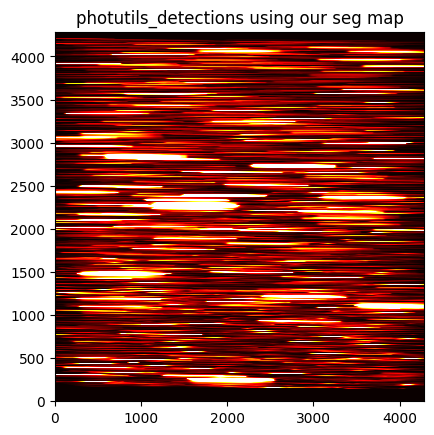

In [5]:
plt.imshow(roman_sim.model/1.9e18, interpolation='Nearest', 
           origin='lower', vmin=0.01, vmax=10, cmap='hot')
plt.title("photutils_detections using our seg map")

In [6]:
raise Exception("Pause before saving")

Exception: Pause before saving

In [7]:
header = fits.open("rotated_GRS_FOV0_roll0_dx0_dy0_SCA1_direct_final.fits")[1].header
fits.writeto("basic-with-seg.fits", roman_sim.model, header=header, overwrite=True)